 Juntar todas as imagens em uma única

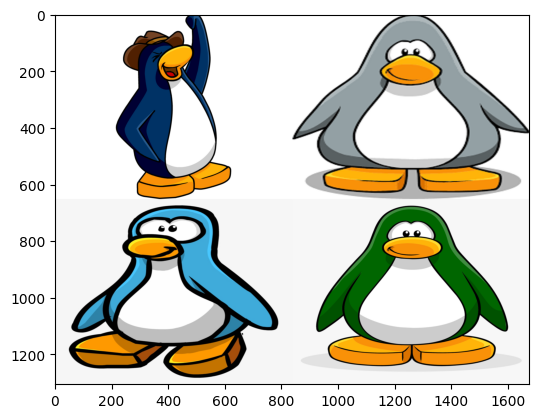

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

peng1 = Image.open('P1.png').convert('RGB')  
peng2 = Image.open('P2.png').convert('RGB')  
peng3 = Image.open('P3.jpg').convert('RGB') 
peng4 = Image.open('P4.png').convert('RGB')  

width, height = peng1.size


peng2 = peng2.resize((width, height))
peng3 = peng3.resize((width, height))
peng4 = peng4.resize((width, height))


todos_peng = Image.new('RGB', (2 * width, 2 * height))

todos_peng.paste(peng1, (0, 0))                   
todos_peng.paste(peng2, (width, 0))              
todos_peng.paste(peng3, (0, height))             
todos_peng.paste(peng4, (width, height))  

plt.imshow(todos_peng)

 Trocar as cores (mudar a cor dos pinguins para qualquer outra)


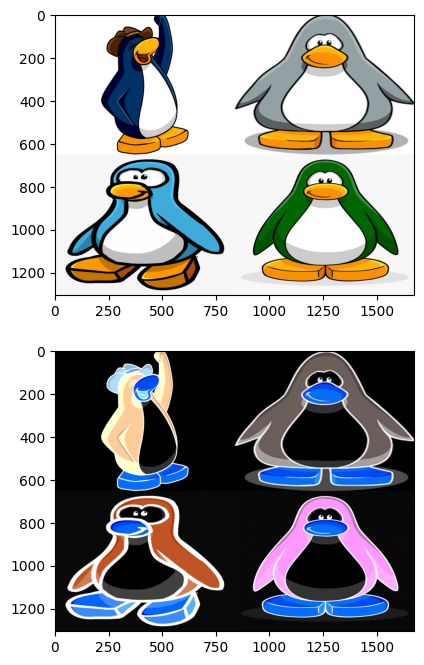

In [63]:

todos_peng=np.array(todos_peng)
(l, c, p) = todos_peng.shape

peng_cmy = np.zeros(shape=todos_peng.shape, dtype=np.float64)
for i in range(l):
    for j in range(c):
        r = todos_peng[i, j, 0]
        g = todos_peng[i, j, 1]
        b = todos_peng[i, j, 2]
        
        peng_cmy[i, j, 0] = (255 - r) / 255 # C
        peng_cmy[i, j, 1] = (255 - g) / 255 # M
        peng_cmy[i, j, 2] = (255 - b) / 255 # Y

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(todos_peng)
plt.subplot(2, 1, 2)
plt.imshow(peng_cmy)



Aplicar o espelhamento

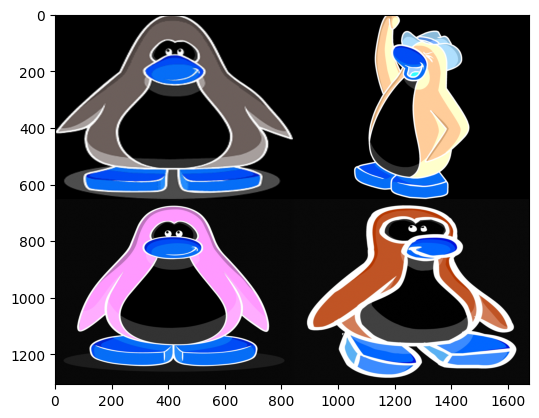

In [65]:

peng_refl = np.zeros(shape=peng_cmy.shape, dtype=np.float64)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        peng_refl[new_y, new_x] = peng_cmy[i, j]

plt.imshow(peng_refl)

Recortar seu pinguim favorito (descarte os outros, deixando apenas um na 
imagem).

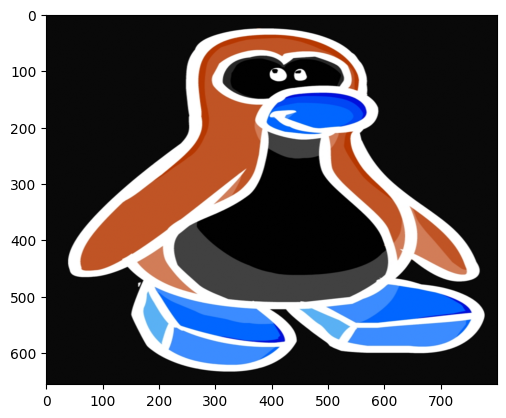

In [66]:


peng_crop = peng_refl[650:1400, 850:1650]

plt.imshow(peng_crop)



Faça a analise do histograma em seu pinguim favorito e escolha um valor de 
threshold. (Justifique a escolha do threshold)

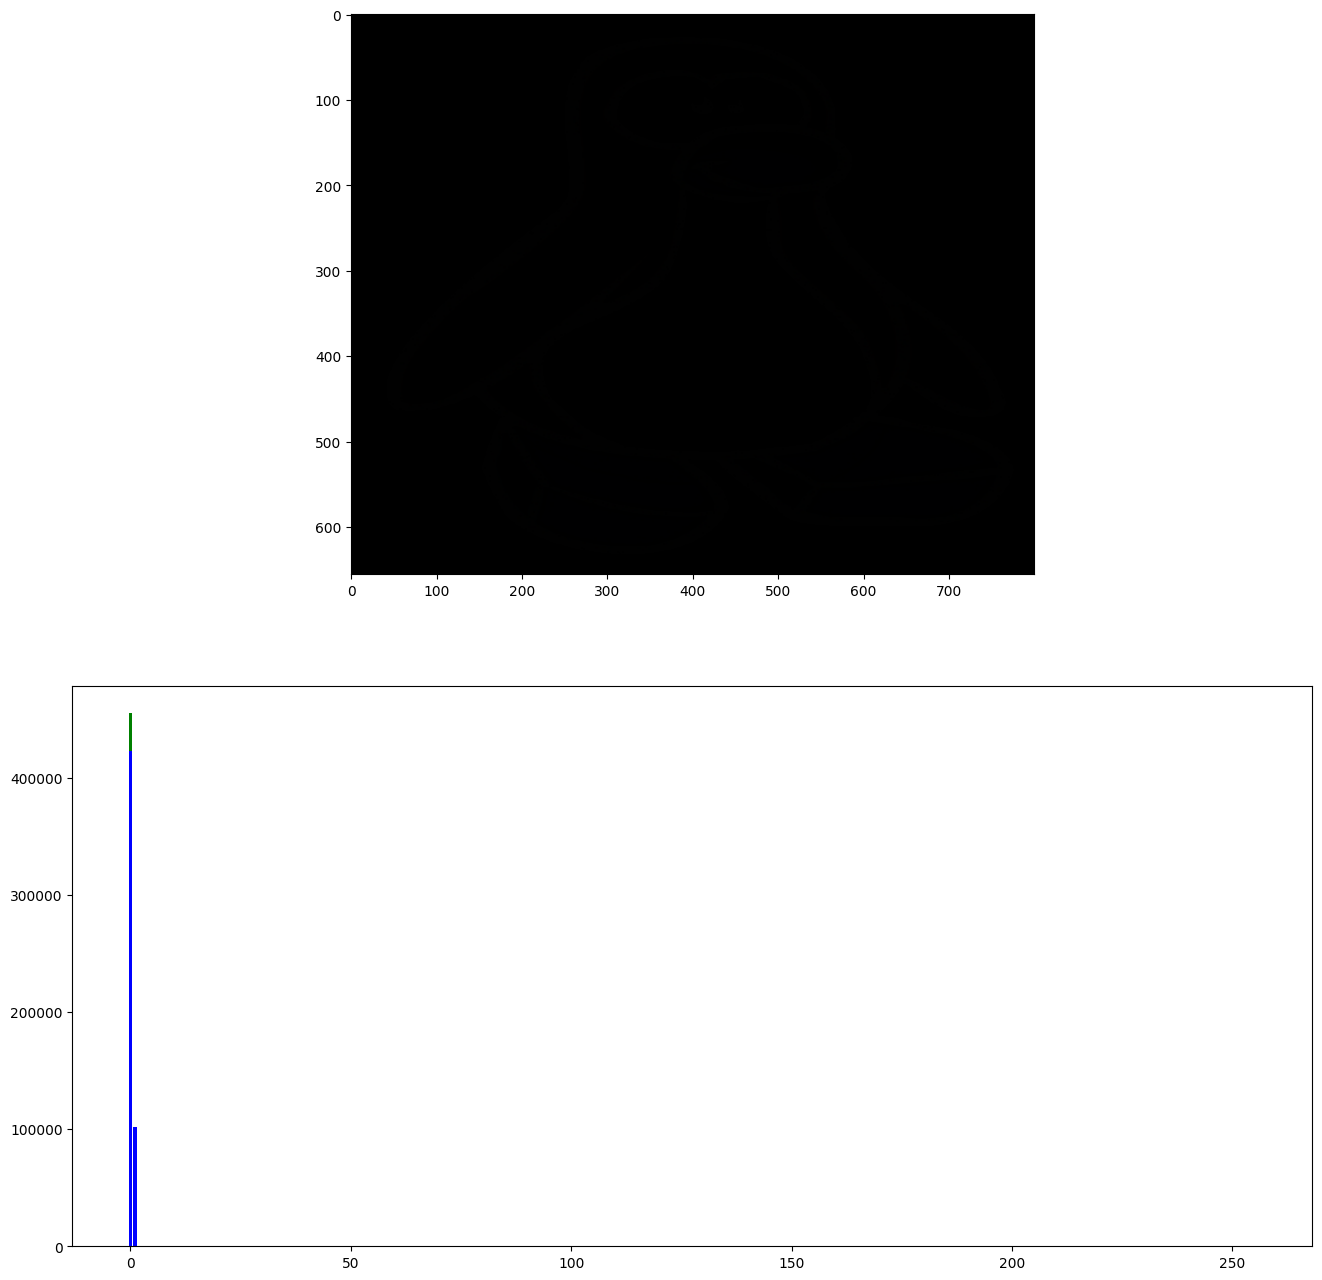

In [73]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

peng_crop=peng_crop.astype(np.uint8)
show_histogram(peng_crop)
#minha imagem nao funciona em int .-.



Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de 
sua cor favorita (por exemplo: Azul)

(656, 800)


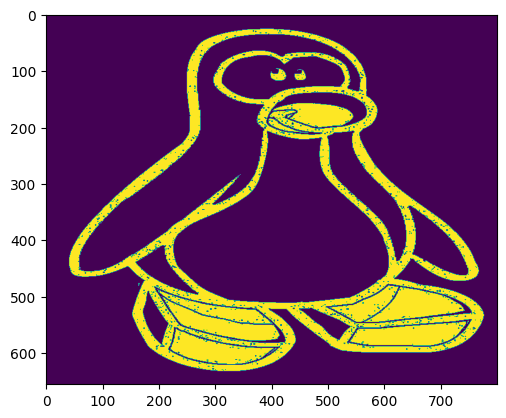

In [75]:
#roxo
(l, c, p) = peng_crop.shape

img_avg = np.zeros(shape=(l, c), dtype=np.float64)
for i in range(l):
    for j in range(c):
        r = 0
        g = 0
        b = float(peng_crop[i, j, 2])
        
        img_avg[i, j] = (r + g + b) / 3
        

plt.imshow(img_avg, )
print(img_avg.shape)